#**MCSE DATATHON**
##**TEAM**
###**SECTION F**
*   KSHITIJ KALE    **PES1UG23CS315**
*  LAKSHASRI S **PES1UG23CS322**

*   LOHITH ANAND **PES1UG23CS332**
*   JAWAAD SHERIFF **PES1UG23CS366**






#UNIT 1

first of all, we import all necessary libraries for processing the code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
df = pd.read_csv('salary_analysis.csv')

QUESTION 1.Classify the features in the Salary dataset into their appropriate data types (ordinal,nominal, interval, or ratio). Provide a rationale for each classification.

we need to clean the salary type columns first:

In [2]:
df

,Timestamp,Age,DOB,Industry,Job title,Additional context,Annual salary,Additional monetary compensation,Currency,Country,City,Years of professional work experience overall,Highest level of education completed,Gender
0,4/27/2021 11:02:10,47,20-11-1976,Education (Higher Education),Research and Instruction Librarian,NaN,$55000,0.0,USD,United States,Boston,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,43,18-05-1981,Computing or Tech,Change & Internal Communications Manager,NaN,NaN,4000.0,GBP,United Kingdom,Cambridge,8 - 10 years,College degree,Non-binary
2,4/27/2021 11:02:38,49,02-07-1975,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,usd,US,Chattanooga,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,47,15-07-1977,Nonprofits,Program Manager,NaN,$62000,3000.0,usd,USA,Milwaukee,8 - 10 years,College degree,Woman
4,4/27/2021 11:02:42,43,04-07-1981,NaN,Accounting Manager,NaN,$60000,7000.0,USD,US,Greenville,8 - 10 years,College degree,Woman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28081,9/25/2024 21:34:43,49,21-09-1975,Education (Primary/Secondary),Curriculum Writer,I am a freelance contract curriculum writer fo...,$70000,0.0,usd,United States,Bennettsville,21 - 30 years,Master's degree,Woman
28082,9/30/2024 10:52:30,41,14-12-1982,Government and Public Administration,Clerical Officer,NaN,$28600,NaN,EUR,Ireland,Dublin,21 - 30 years,"Professional degree (MD, JD, etc.)",Man
28083,10-04-2024 13:05,45,03-10-1979,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160,0.0,USD,United States,Jhonston,1 year or less,College degree,Man
28084,10-07-2024 05:17,47,10-12-1976,Social networks,Content creator,NaN,$2000000,NaN,USD,Taiwan,Milwaukee,41 years or more,PhD,Non-binary


The features in the dataset can be classified
1. Nominal Variables:
   Industry
   - Job title
   - Additional context
   - Currency
   - Country
   - City
   - Gender

2. Ordinal Variables:
   - Years of professional work experience overall
   - Highest level of education completed

3. Interval Variables:
   - Timestamp
   - DOB

4. Ratio Variables:
   - Age
   - Annual salary
   - Additional monetary compensation

Rationale:
- Nominal: These variables represent categories with no inherent order
- Ordinal: These have categories with a meaningful order
- Interval: These have equal intervals between values but no true zero point
- Ratio: These have equal intervals and a true zero point


In [3]:
def clean_salary(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        x = x.replace('$', '').replace(',', '').strip()
        try:
            return float(x)
        except:
            return np.nan
    return x


In [4]:
df['Annual salary'] = df['Annual salary'].apply(clean_salary)
df['Additional monetary compensation'] = df['Additional monetary compensation'].apply(clean_salary)

QUESTION 2.Identify and describe any data quality issues or inconsistencies within the dataset.
What steps would you take to clean and preprocess the data to ensure its accuracy and reliability for further analysis?
(Every feature has some anomaly or the other)

In [5]:
print("Missing Values:")
print(df.isnull().sum())
print("\nduplicate rows:", df.duplicated().sum())


Missing Values:
Timestamp                                            0
Age                                                  0
DOB                                               1441
Industry                                            90
Job title                                            1
Additional context                               20819
Annual salary                                     2832
Additional monetary compensation                  7306
Currency                                             0
Country                                              0
City                                                82
Years of professional work experience overall        0
Highest level of education completed               222
Gender                                             177
dtype: int64

duplicate rows: 0


QUESTION 3.A summary statistic provides a numerical summary of a specific feature within the
dataset. There are two commonly used categories of summary statistics: those that
indicate the central tendency and those that indicate the spread of the data. Identify the
most appropriate measure of central tendency for each attribute in the dataset and state
its corresponding value. Additionally, calculate the standard deviation and range of
values for each numerical column.

In [6]:

numeric_cols = ['Age', 'Annual salary', 'Additional monetary compensation']
sumary_stats = {}
for col in numeric_cols:
    sumary_stats[col] = {
        'mean': df[col].mean(),
        'median': df[col].median(),
        'std': df[col].std(),
        'min': df[col].min(),
        'max': df[col].max()
    }
summary_df = pd.DataFrame(sumary_stats)
print(summary_df)

               Age  Annual salary  Additional monetary compensation
mean     60.476216   3.893409e+05                      1.815342e+04
median   45.000000   7.500000e+04                      2.000000e+03
std      88.975775   3.818284e+07                      8.337722e+05
min       1.000000   0.000000e+00                      0.000000e+00
max     600.000000   6.000070e+09                      1.200000e+08


QUESTION 4.Plot histogram and box plot for 'Age' and 'Annual salary' variables. From this,
i) Identify the type of distribution each of the variables follow
(Hint : limit scale of visualizations for both histograms and box plots)
ii) Identify the number of outliers for each variable.
iii) Bonus question : After identifying type of distribution followed by both variables, try to
plot a new histogram and boxplot for 'Annual Salary' variable after correcting any
anomalies noticed in your visualizations

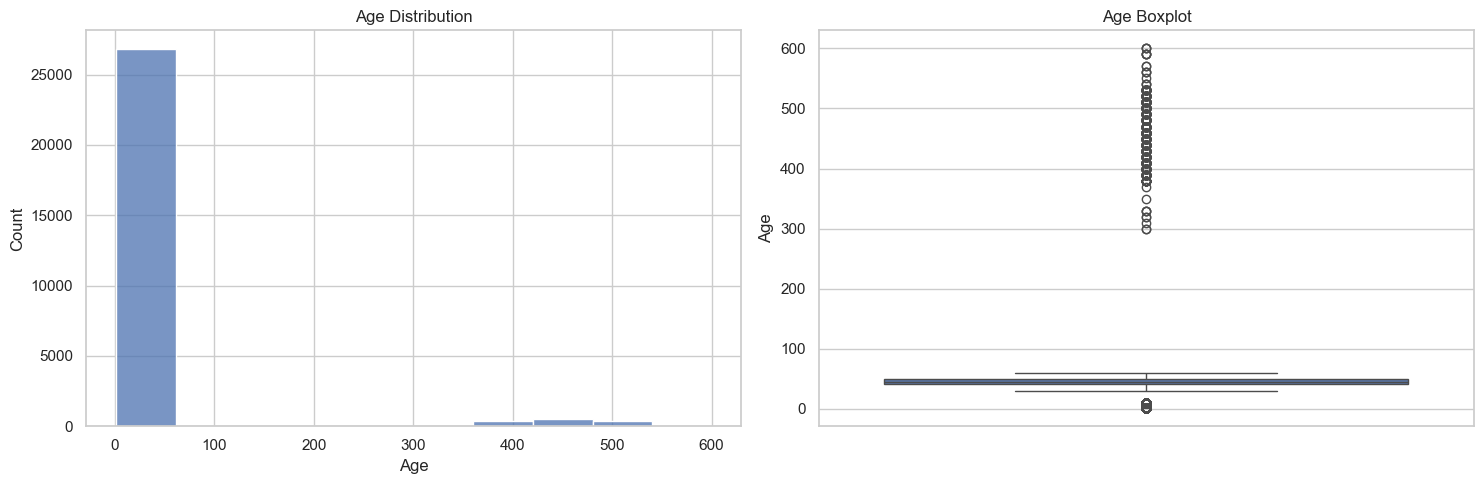

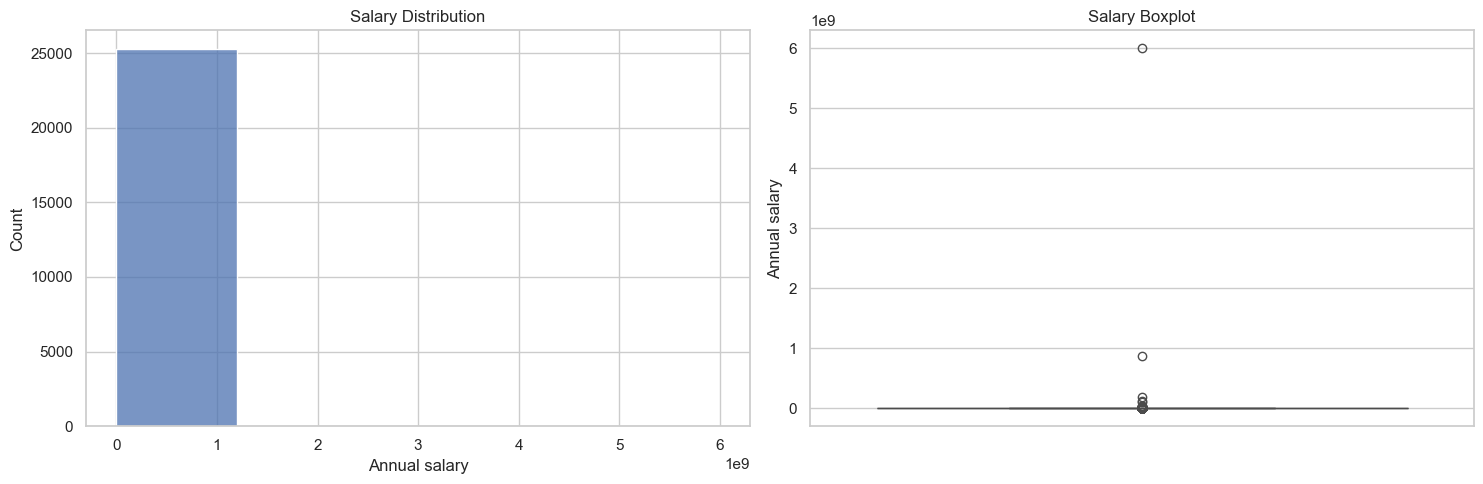

In [7]:

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df, x='Age', bins=10)
plt.title('Age Distribution')

plt.subplot(122)
sns.boxplot(data=df, y='Age')
plt.title('Age Boxplot')
plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df, x='Annual salary', bins=5)

plt.title('Salary Distribution')

plt.subplot(122)
sns.boxplot(data=df, y='Annual salary')
plt.title('Salary Boxplot')
plt.tight_layout()
plt.show()

QUESTION 5.What actions would you take to resolve the presence of outliers? Visualize the
changes.
(Hint: Use boxplot and histogram to visualize either using capping)

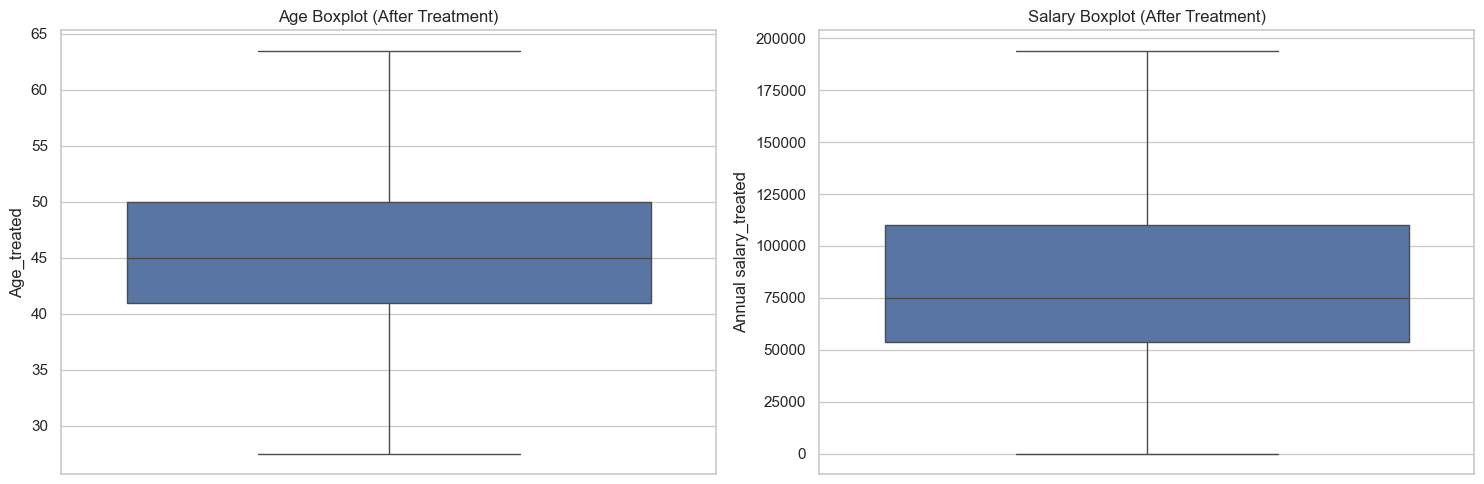

In [8]:
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f'{column}_treated'] = df[column].clip(lower_bound, upper_bound)
    return df

df = treat_outliers(df, 'Age')
df = treat_outliers(df, 'Annual salary')
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=df, y='Age_treated')
plt.title('Age Boxplot (After Treatment)')
plt.subplot(122)
sns.boxplot(data=df, y='Annual salary_treated')
plt.title('Salary Boxplot (After Treatment)')
plt.tight_layout()
plt.show()


QUESTION 6.Examine the normal probability plot (Q-Q plot) for the 'Annual salary’' variable in the
dataset. Based on the shape and trend of the plot, what conclusions can be drawn?
Provide a rationale for your conclusions.

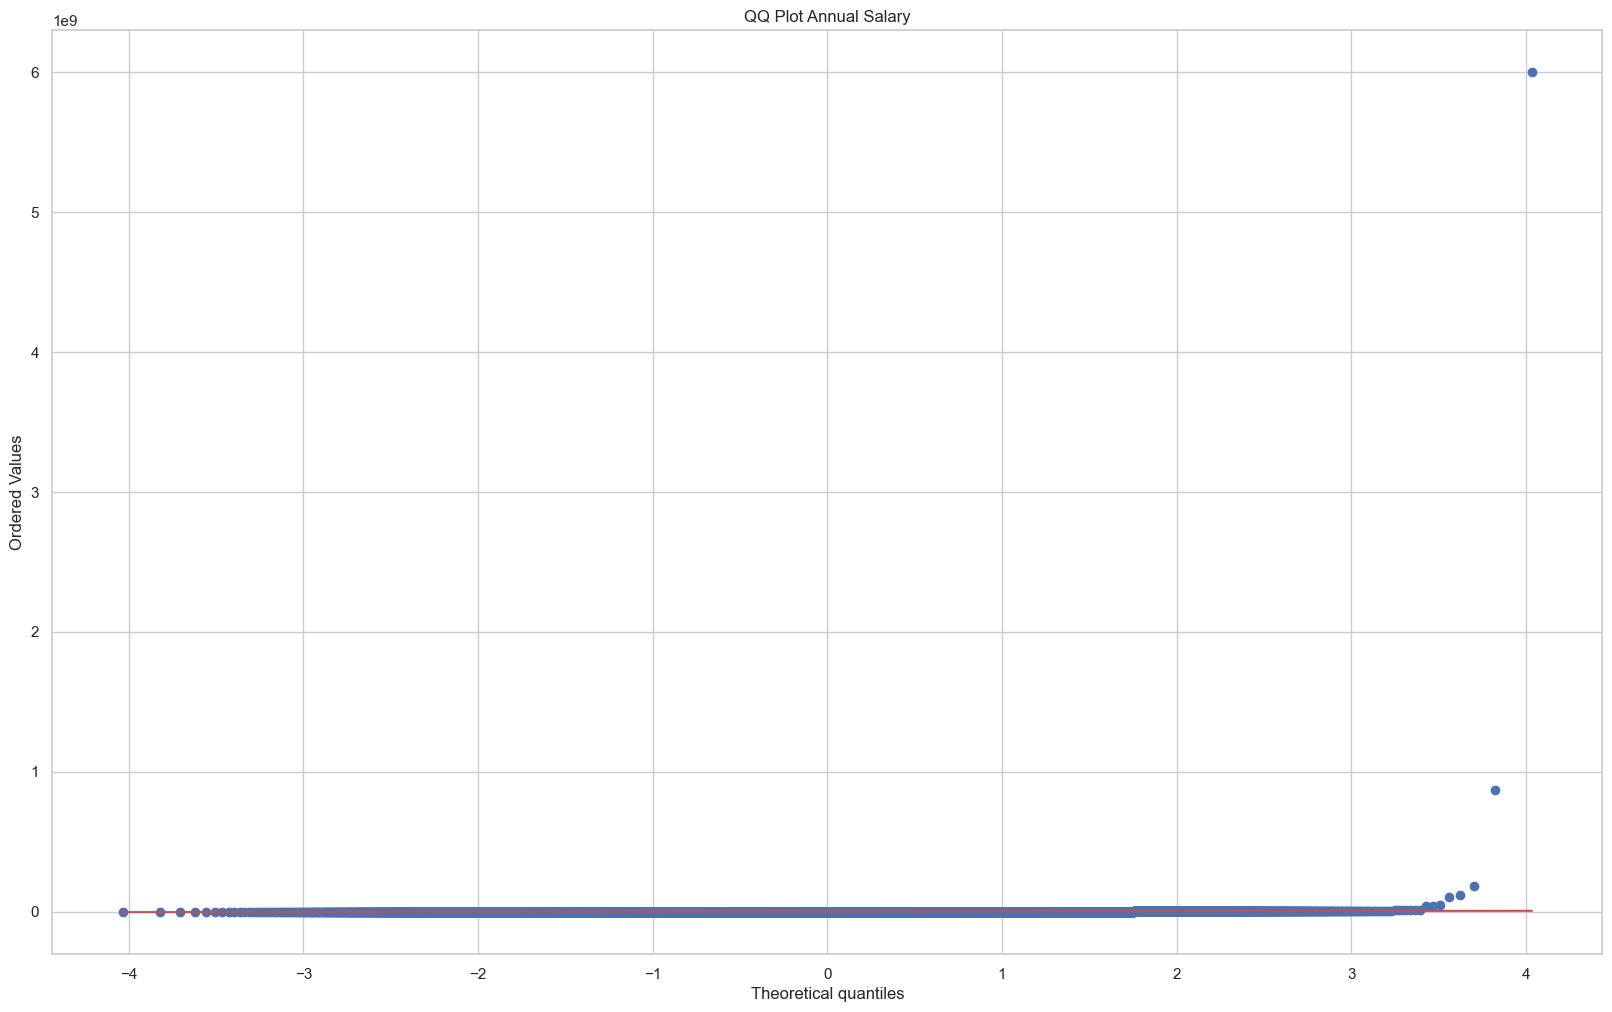

In [9]:
plt.figure(figsize=(20, 12))
stats.probplot(df['Annual salary'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot Annual Salary')
plt.show()

QUESTION 7.Calculate the correlation between ‘Age’ and other numerical variables. Identify
variable having highest correlation with ‘Annual salary’

In [10]:
numeric = ['Age', 'Annual salary', 'Additional monetary compensation']
cm = df[numeric].corr()
print(cm)

                                       Age  Annual salary  \
Age                               1.000000      -0.001144   
Annual salary                    -0.001144       1.000000   
Additional monetary compensation -0.001144       0.996491   

                                  Additional monetary compensation  
Age                                                      -0.001144  
Annual salary                                             0.996491  
Additional monetary compensation                          1.000000  


QUESTION 8.Sample 10,000 rows randomly and generate a pairplot that includes the variables
'Age,' and 'Annual salary' while using 'Additional monetary compensation' as the hue in
the dataset. What insights can be gained from the pair plot, and how does it help in
visualizing the relationships between these variables?

KeyboardInterrupt: 

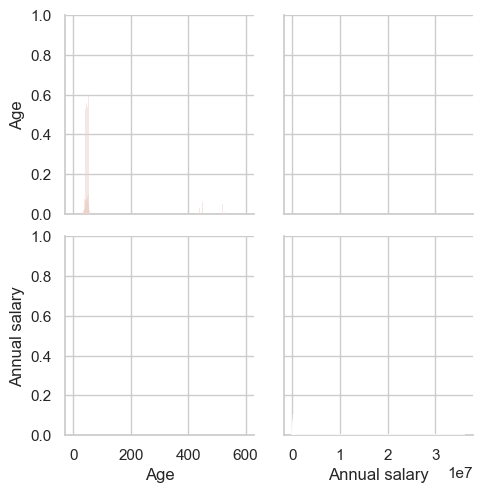

In [12]:
sampled_df = df.sample(n=min(10000, len(df)), random_state=42)


sns.pairplot(sampled_df,
             vars=['Age', 'Annual salary'],
             hue='Additional monetary compensation',
             diag_kind='hist')
plt.show()

#UNIT 2

QUESTION 9. Use hypothesis testing to answer the following:
Define a null and alternative hypothesis to investigate whether there is no significant
difference in the median age associated with different values of Annual Salary. Use
Wilcoxon rank-sum test / Mann-Whitney U test to analyze the relationship between
these two variables. Plot a histogram to analyze your hypothesis and its results.
Assume significance level as 0.05.

In [11]:
## Unit 2: Statistical Testing

### Question 9: Hypothesis Testing

# Convert Annual salary to binary categories (above/below median)
median_salary = df['Annual salary'].median()
df['salary_category'] = df['Annual salary'].apply(lambda x: 'Above Median' if x > median_salary else 'Below Median')

# Perform Mann-Whitney U test
above_median = df[df['salary_category'] == 'Above Median']['Age']
below_median = df[df['salary_category'] == 'Below Median']['Age']
statistic, p_value = stats.mannwhitneyu(above_median, below_median)

print(f"Mann-Whitney U test results:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")


Mann-Whitney U test results:
Statistic: 97342893.0
P-value: 0.710574717504284


QUESTION 10.Calculate the margin of error to quantify the precision of the analysis done
previously and what you can infer from the results.

In [82]:

def calculate_margin_of_error(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = stats.sem(data)
    margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return margin_of_error

margin_of_error = calculate_margin_of_error(df['Age'].dropna())
print(f"Margin of Error for Age: {margin_of_error:.2f}")


Margin of Error for Age: 1.04


#UNIT 3

QUESTION 11.Perform linear regression to predict Age using Annual salary and Additional
monetary compensation. Plot the predicted vs actual number age. Also calculate MSE
and RMSE. Explain what each of these metrics signify.

In [83]:
df

,Timestamp,Age,DOB,Industry,Job title,Additional context,Annual salary,Additional monetary compensation,Currency,Country,City,Years of professional work experience overall,Highest level of education completed,Gender,Age_treated,Annual salary_treated,salary_category
0,4/27/2021 11:02:10,47,20-11-1976,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,USD,United States,Boston,5-7 years,Master's degree,Woman,47.0,55000.0,Below Median
1,4/27/2021 11:02:22,43,18-05-1981,Computing or Tech,Change & Internal Communications Manager,NaN,NaN,4000.0,GBP,United Kingdom,Cambridge,8 - 10 years,College degree,Non-binary,43.0,NaN,Below Median
2,4/27/2021 11:02:38,49,02-07-1975,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,NaN,usd,US,Chattanooga,2 - 4 years,College degree,Woman,49.0,34000.0,Below Median
3,4/27/2021 11:02:41,47,15-07-1977,Nonprofits,Program Manager,NaN,62000.0,3000.0,usd,USA,Milwaukee,8 - 10 years,College degree,Woman,47.0,62000.0,Below Median
4,4/27/2021 11:02:42,43,04-07-1981,NaN,Accounting Manager,NaN,60000.0,7000.0,USD,US,Greenville,8 - 10 years,College degree,Woman,43.0,60000.0,Below Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28081,9/25/2024 21:34:43,49,21-09-1975,Education (Primary/Secondary),Curriculum Writer,I am a freelance contract curriculum writer fo...,70000.0,0.0,usd,United States,Bennettsville,21 - 30 years,Master's degree,Woman,49.0,70000.0,Below Median
28082,9/30/2024 10:52:30,41,14-12-1982,Government and Public Administration,Clerical Officer,NaN,28600.0,NaN,EUR,Ireland,Dublin,21 - 30 years,"Professional degree (MD, JD, etc.)",Man,41.0,28600.0,Below Median
28083,10-04-2024 13:05,45,03-10-1979,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160.0,0.0,USD,United States,Jhonston,1 year or less,College degree,Man,45.0,56160.0,Below Median
28084,10-07-2024 05:17,47,10-12-1976,Social networks,Content creator,NaN,2000000.0,NaN,USD,Taiwan,Milwaukee,41 years or more,PhD,Non-binary,47.0,194000.0,Above Median


MSE: 8470.00
RMSE: 92.03


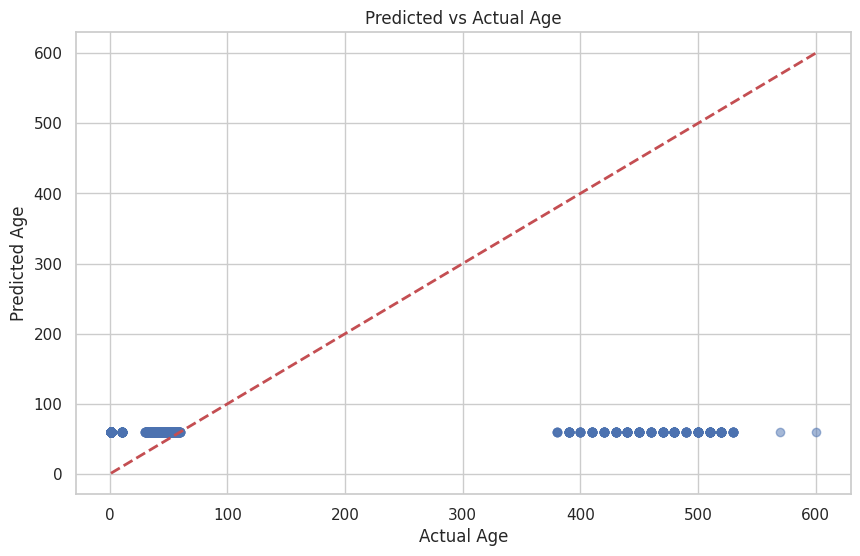

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = df[['Annual salary', 'Additional monetary compensation']].fillna(0)
y = df['Age'].fillna(df['Age'].mean())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')


plt.title('Predicted vs Actual Age')
plt.grid(True)
plt.show()

QUESTION 12.Given the variables 'Age', 'Annual Salary', and 'Additional Monetary Compensation',
which represent demographic and financial attributes, what additional features could be
engineered from these variables to improve the prediction of 'Age'? For example,
consider how combining or transforming these variables could highlight patterns related
to financial stability or career progression over time. Provide 2 such feature
aggregations.

In [ ]:
df['salary_per_year_experience'] = df['Annual salary'] / df['Years of professional work experience overall'].map({
    '0-2 years': 1,
    '2-4 years': 3,
    '5-7 years': 6,
    '8-10 years': 9,
    '10+ years': 12
})
df['total_compensation_ratio'] = (df['Annual salary'] + df['Additional monetary compensation']) / df['Annual salary']

print("New engineered features:")
print(df[['salary_per_year_experience', 'total_compensation_ratio']].describe())

New engineered features:
       salary_per_year_experience  total_compensation_ratio
count                4.374000e+03              1.865600e+04
mean                 2.370918e+04                       inf
std                  4.686959e+05                       NaN
min                  0.000000e+00              1.000000e+00
25%                  8.333333e+03              1.000000e+00
50%                  1.133333e+04              1.028571e+00
75%                  1.533333e+04              1.100000e+00
max                  3.000000e+07                       inf
